In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split

In [2]:
previsores = pd.read_csv("entradas-breast.csv")
previsores.head(3)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,186.0000,275.0000,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,243.0000,0.3613,0.08758


In [3]:
classes = pd.read_csv("saidas-breast.csv")
classes.head(3)

,0
0,0
1,0
2,0


In [4]:
previsores_train, previsores_test, classes_train, classes_test = train_test_split(previsores, classes, test_size = 0.25)

In [5]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import initializers

Using TensorFlow backend.
/home/jarbasjr/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jarbasjr/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jarbasjr/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jarbasjr/.local/lib/python3.6/site-packages/tensorflo

In [6]:
classificador = Sequential()

W0827 19:32:46.172676 140250001225536 deprecation_wrapper.py:119] From /home/jarbasjr/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [7]:
classificador.add(Dense(units=16, activation='relu', kernel_initializer='random_uniform', input_dim=30))

W0827 19:32:46.200693 140250001225536 deprecation_wrapper.py:119] From /home/jarbasjr/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0827 19:32:46.204100 140250001225536 deprecation_wrapper.py:119] From /home/jarbasjr/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



# Criando mais uma camada oculta

## Só é preciso copiar a codificação acima, e retirar 'input_dim' pois só insere isto na primeira camada oculta, e assim adicionar uma nova camada oculta sequencialmente. 

## Não necessariamente precisa colocar 16 neurônios, em geral coloca-se a mesma quantidade de neurônios mas aqui será necessario realizar testes com parâmetros para observar a melhor configuração, se coloca mais ou menos neurônios.

## E caso queria colocar mais camadas ocultas, só copiar e colar a linha abaixo.

In [8]:
classificador.add(Dense(units=16, activation='relu', kernel_initializer='random_uniform'))

In [9]:
classificador.add(Dense(units=1, activation='sigmoid'))

# Parâmetros do Otimizador 

## otimizador = keras.optimizers.Adam()

## Alterar os três principais parâmetros: Learning Rate, decay e clip value.

# Learning Rate

## Serve para chegarmos ao minimo global, se tiver um learning rate grande ele vai seguindo a passos mais largos com uma ajuste de pesos maior e a tendência é que ele chegue no minimo global de forma mais rapida, porém se ele tiver uma learning rate muito alta ele pode acabar passando/não detectando o minimo global, se for learning rate pequeno ele vai a passos menores e terá maior chance de chegar no minimo global, poŕem de forma mais lenta. Configuramos através do 'lr'.

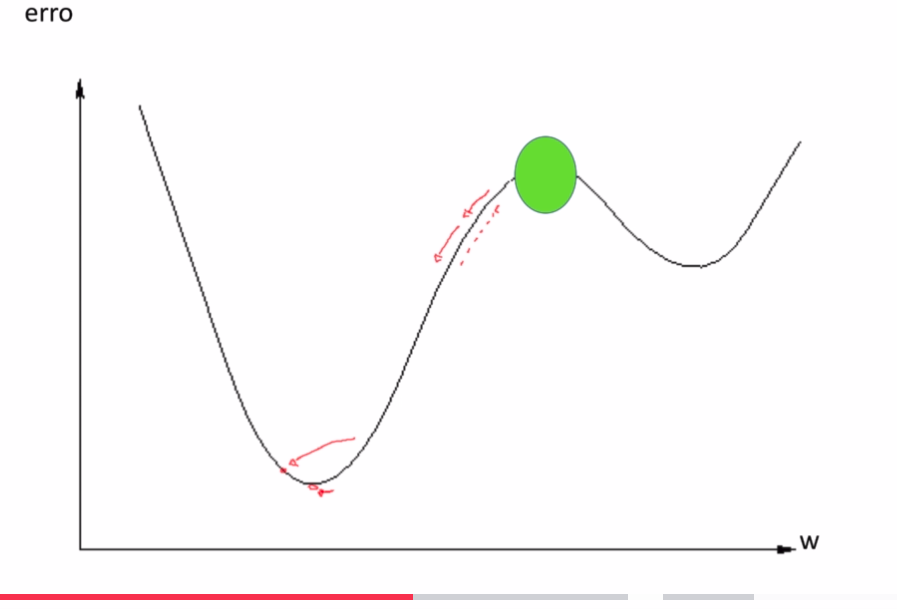

# decay

## Vai indicar quanto que o 'learning rate' vai ser decrementado a cada iteração/ataualização de pesos, supondo que o lr começa em 0.001 na primeir vez que houver a atualização e na segunda o lr vai para 0.0001, mas a atualização não será tao grande, será uma valor bem pequeno. Como na figura, começa com um learning rate alto, na primeira vez, na segunda diminui um pouco e assim sucessivamente. Parâmetro que acelera o processo pois pode-se colocar um lr um pouco mais alto, pois dificilmente vai encontrar a melhor solução nas primeiras iterações. Então ele vai diminuindo o lr reduzindo o risco de não encontrar o minimo global.

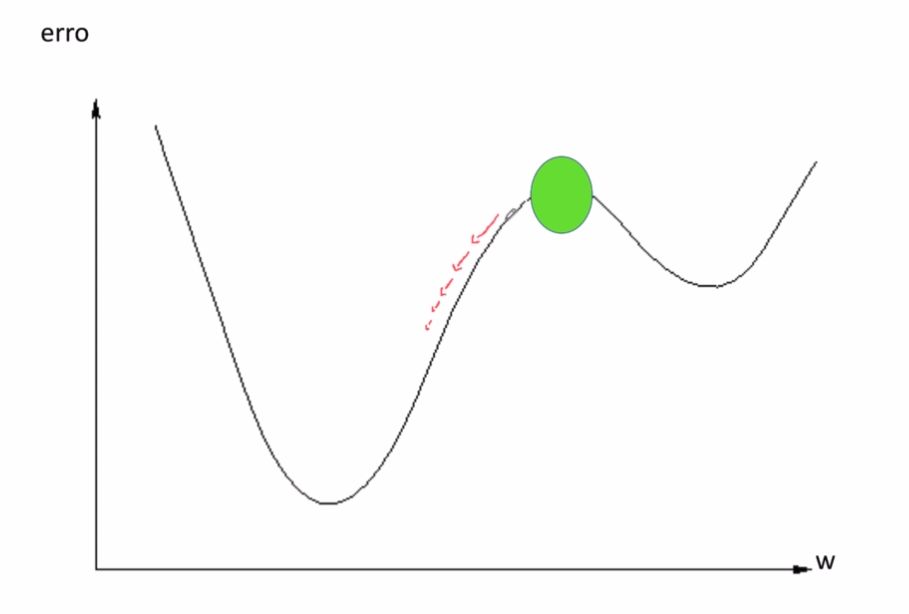

# clipvalue

## Ele vai 'clipped' siginifca como se ele fosse prender o valor, então ele vai evitar que aconteça como na imagem. Então pode exemplo, como no padrão em que clipvalue é 0.5, ele  vai congelar esses valores na faixa de mais e menos 0.5 para evitar que eles saiam do padrão, evitando dispersão para que ele chegue no minimo global, e prenda o valor para evitar que fique muito disperso no gradiente.

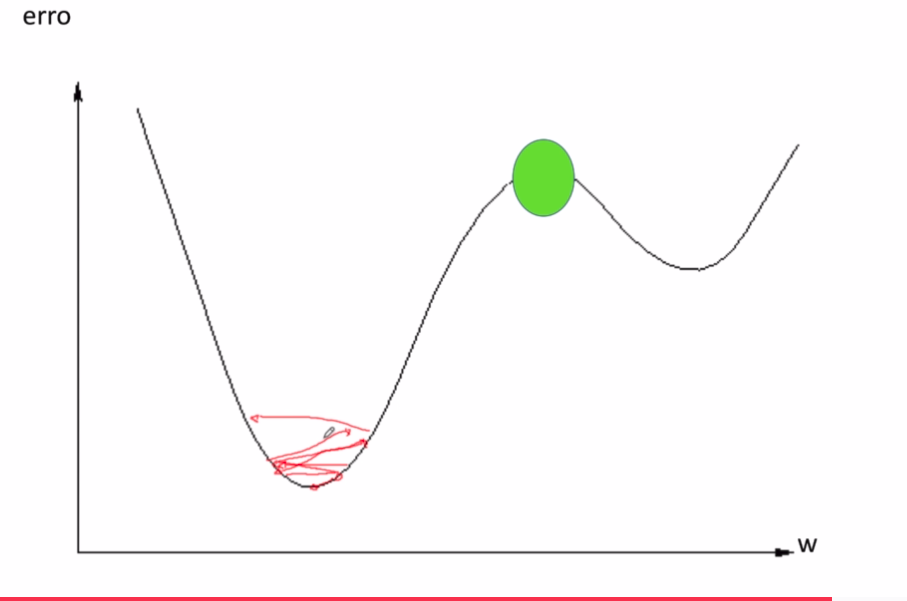

In [10]:
otimizador = keras.optimizers.Adam(lr = 0.001, decay=0.0001, clipvalue=0.5) # coloca o otimizador configurado aqui no 'optimizer', fazer testes mundando estes três parâmetros.

In [11]:
classificador.compile(optimizer=otimizador, loss='binary_crossentropy', metrics = ['binary_accuracy'])

W0827 19:32:46.304395 140250001225536 deprecation_wrapper.py:119] From /home/jarbasjr/.local/lib/python3.6/site-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0827 19:32:46.309993 140250001225536 deprecation_wrapper.py:119] From /home/jarbasjr/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3657: The name tf.log is deprecated. Please use tf.math.log instead.

W0827 19:32:46.317392 140250001225536 deprecation.py:323] From /home/jarbasjr/.local/lib/python3.6/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [12]:
classificador.fit(previsores_train, classes_train, batch_size=10, epochs=100)

W0827 19:32:46.461749 140250001225536 deprecation_wrapper.py:119] From /home/jarbasjr/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/100
426/426 [==============================] - 0s 656us/step - loss: 0.7498 - binary_accuracy: 0.5939
Epoch 2/100
426/426 [==============================] - 0s 97us/step - loss: 0.6529 - binary_accuracy: 0.6784
Epoch 3/100
426/426 [==============================] - 0s 82us/step - loss: 0.6103 - binary_accuracy: 0.6995
Epoch 4/100
426/426 [==============================] - 0s 88us/step - loss: 0.5435 - binary_accuracy: 0.7629
Epoch 5/100
426/426 [==============================] - 0s 96us/step - loss: 0.4785 - binary_accuracy: 0.7700
Epoch 6/100
426/426 [==============================] - 0s 101us/step - loss: 0.4262 - binary_accuracy: 0.8028
Epoch 7/100
426/426 [==============================] - 0s 101us/step - loss: 0.3955 - binary_accuracy: 0.8333
Epoch 8/100
426/426 [==============================] - 0s 86us/step - loss: 0.3878 - binary_accuracy: 0.8568
Epoch 9/100
426/426 [==============================] - 0s 102us/step - loss: 0.3932 - binary_accuracy: 0.8333
Epoch 10/100
42

426/426 [==============================] - 0s 109us/step - loss: 0.4450 - binary_accuracy: 0.8638
Epoch 76/100
426/426 [==============================] - 0s 124us/step - loss: 0.4723 - binary_accuracy: 0.8592
Epoch 77/100
426/426 [==============================] - 0s 110us/step - loss: 0.3573 - binary_accuracy: 0.8779
Epoch 78/100
426/426 [==============================] - 0s 92us/step - loss: 0.4679 - binary_accuracy: 0.8545
Epoch 79/100
426/426 [==============================] - 0s 93us/step - loss: 0.5146 - binary_accuracy: 0.8380
Epoch 80/100
426/426 [==============================] - 0s 108us/step - loss: 0.3711 - binary_accuracy: 0.8685
Epoch 81/100
426/426 [==============================] - 0s 90us/step - loss: 0.3572 - binary_accuracy: 0.8850
Epoch 82/100
426/426 [==============================] - 0s 111us/step - loss: 0.3945 - binary_accuracy: 0.8756
Epoch 83/100
426/426 [==============================] - 0s 107us/step - loss: 0.3542 - binary_accuracy: 0.8967
Epoch 84/100
426/

In [13]:
previsoes = classificador.predict(previsores_test)
previsoes = (previsoes > 0.5) # Como o classificador retorna 'sigmoid' na saida, apresentando porcentagens, aqui considera-se que qualquer valor acima de 0.5 seja True(1), caso contrario False(0). Necessario para avaliar a classificação binaria.


In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score #utilizando recursos do keras para avaliação

In [15]:
precisao = accuracy_score(classes_test, previsoes)
precisao

0.8671328671328671

In [16]:
matriz = confusion_matrix(classes_test, previsoes)
matriz

array([[36, 15],
       [ 4, 88]])

In [17]:
resultado = classificador.evaluate(previsores_test, classes_test) # também pode-se usar os recursos do keras para avaliar o modelo, onde ele informa o valor da função de erro e a precisão. Pode usar o recursos tanto do sklearn como do keras.
resultado

143/143 [==============================] - 0s 347us/step


[0.652470399866571, 0.8671328679664986]